<a href="https://colab.research.google.com/github/GayathriShrikanth/AI_CryptAux/blob/master/Exp9/lab9_Keras_2DCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conv2D

```
keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)
```

##2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the batch axis), e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".

##Arguments

1. filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
2. kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
3. strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Specifying any stride value != 1 is incompatible with specifying any dilation_rate value != 1.
4. padding: one of "valid" or "same" (case-insensitive). Note that "same" is slightly inconsistent across backends with strides != 1, as described here
5. data_format: A string, one of "channels_last" or "channels_first". The ordering of the dimensions in the inputs. "channels_last" corresponds to inputs with shape (batch, height, width, channels) while "channels_first" corresponds to inputs with shape (batch, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".
6. dilation_rate: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.
7. activation: Activation function to use (see activations). If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
8. use_bias: Boolean, whether the layer uses a bias vector.
9. kernel_initializer: Initializer for the kernel weights matrix (see initializers).
10. bias_initializer: Initializer for the bias vector (see initializers).
11. kernel_regularizer: Regularizer function applied to the kernel weights matrix (see regularizer).
12. bias_regularizer: Regularizer function applied to the bias vector (see regularizer).
13. activity_regularizer: Regularizer function applied to the output of the layer (its "activation"). (see regularizer).
14. kernel_constraint: Constraint function applied to the kernel matrix (see constraints).
15. bias_constraint: Constraint function applied to the bias vector (see constraints).

##Input shape

4D tensor with shape: (batch, channels, rows, cols) if data_format is "channels_first" or 4D tensor with shape: (batch, rows, cols, channels) if data_format is "channels_last".

##Output shape

4D tensor with shape: (batch, filters, new_rows, new_cols) if data_format is "channels_first" or 4D tensor with shape: (batch, new_rows, new_cols, filters) if data_format is "channels_last". rows and cols values might have changed due to padding

#Aim

To classify images as Cats or Dogs

#High-level steps to build the CNN to classify images are
1. Create convolutional layers by applying kernel or feature maps
2. Apply Max pool for translational invariance
3. Flatten the inputs
4. Create a Fully connected neural network
5. Train the model
6. Predict the output

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step
x_train shape: (10000, 32, 32, 3)
10000 train samples
2000 test samples


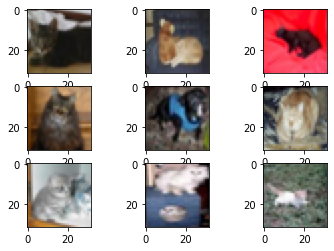

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

#Input image dimensions
img_rows, img_cols = 32, 32
num_classes = 2
#The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Only look at cats [=3] and dogs [=5]
train_picks = np.ravel(np.logical_or(y_train==3,y_train==5))  
test_picks = np.ravel(np.logical_or(y_test==3,y_test==5))
y_train = np.array(y_train[train_picks]==5,dtype=int)
y_test = np.array(y_test[test_picks]==5,dtype=int)
x_train = x_train[train_picks]
x_test = x_test[test_picks]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    
#Show the plot
plt.show()

#Building CNN

In [0]:
from keras.models import Sequential
classifier = Sequential()

#Create 2D CNN layer

In [0]:
from keras.layers import Conv2D

classifier.add(Conv2D(filters=32, kernel_size=(3,3),strides=(1, 1), input_shape=(32,32,3), activation='relu'))

#Max pooling

In [0]:
from keras.layers import MaxPooling2D
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Add CNN and max pooling

In [0]:
classifier.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Flatten

In [0]:
from keras.layers import Flatten
classifier.add(Flatten())

#Add dense and dropout layers

In [0]:
from keras.layers import Dense
from keras.layers import Dropout
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(rate=0.2))
classifier.add(Dense(units=1, activation='sigmoid'))

#Compile

In [0]:
classifier.compile( optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

#Image generator

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# Rotate images by 90 degrees
datagen = ImageDataGenerator(rotation_range=90, rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 vertical_flip=True,
 width_shift_range=.2, height_shift_range=.2, fill_mode='nearest')

# fit parameters from data
datagen.fit(x_train)

#Fit model

In [0]:
# fits the model on batches with real-time data augmentation:
classifier.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)




Epoch 1/10





313/312 [==============================] - 22s 70ms/step - loss: 0.6933 - acc: 0.5025
Epoch 2/10
313/312 [==============================] - 9s 28ms/step - loss: 0.6933 - acc: 0.4953
Epoch 3/10
313/312 [==============================] - 9s 28ms/step - loss: 0.6932 - acc: 0.5004
Epoch 4/10
313/312 [==============================] - 9s 28ms/step - loss: 0.6932 - acc: 0.5007
Epoch 5/10
313/312 [==============================] - 9s 28ms/step - loss: 0.6931 - acc: 0.5065
Epoch 6/10
313/312 [==============================] - 9s 28ms/step - loss: 0.6932 - acc: 0.5052
Epoch 7/10
313/312 [==============================] - 9s 29ms/step - loss: 0.6933 - acc: 0.4929
Epoch 8/10
313/312 [==============================] - 9s 30ms/step - loss: 0.6932 - acc: 0.4963
Epoch 9/10
313/312 [==============================] - 9s 30ms/step - loss: 0.6932 - acc: 0.4911
Epoch 10/10
313/312 [==============================] - 9s 30ms/step - loss: 0.6932 - acc: 0.4961


#Exercise 2: Cat / Dog classifier



In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


# Initialising the CNN
classifier = Sequential()
# Step 1 — Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
# Step 2 — Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 — Flattening
classifier.add(Flatten())
# Step 4 — Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN we shall use the Adam stochastic optimisation method, binary cross entropy loss function
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
# Rotate images by 90 degrees
datagen = ImageDataGenerator(rotation_range=90, rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 vertical_flip=True,
 width_shift_range=.2, height_shift_range=.2, fill_mode='nearest')

# fit parameters from data
datagen.fit(x_train)

# fits the model on batches with real-time data augmentation:
classifier.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)

Epoch 1/10
313/312 [==============================] - 12s 39ms/step - loss: 0.6933 - accuracy: 0.4960
Epoch 2/10
313/312 [==============================] - 6s 19ms/step - loss: 0.6932 - accuracy: 0.4942
Epoch 3/10
313/312 [==============================] - 6s 19ms/step - loss: 0.6932 - accuracy: 0.4964
Epoch 4/10
313/312 [==============================] - 6s 19ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 5/10
313/312 [==============================] - 6s 19ms/step - loss: 0.6932 - accuracy: 0.5000
Epoch 6/10
313/312 [==============================] - 6s 19ms/step - loss: 0.6932 - accuracy: 0.4874
Epoch 7/10
313/312 [==============================] - 6s 20ms/step - loss: 0.6932 - accuracy: 0.4992
Epoch 8/10
313/312 [==============================] - 6s 19ms/step - loss: 0.6932 - accuracy: 0.4956
Epoch 9/10
313/312 [==============================] - 6s 18ms/step - loss: 0.6932 - accuracy: 0.4996
Epoch 10/10
313/312 [==============================] - 6s 18ms/step - loss: 0.6932 - accur

#Exercise 3: Building a Convolutional Neural Network (CNN) in Keras for MNIST

In this tutorial, we will use the popular mnist dataset. This dataset consists of 70,000 images of handwritten digits from 0–9. We will attempt to identify them using a CNN.

##Loading the dataset

The mnist dataset is conveniently provided to us as part of the Keras library, so we can easily load the dataset. Out of the 70,000 images provided in the dataset, 60,000 are given for training and 10,000 are given for testing.

When we load the dataset below, X_train and X_test will contain the images, and y_train and y_test will contain the digits that those images represent.

In [0]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


#Exploratory data analysis
Now let’s take a look at one of the images in our dataset to see what we are working with. We will plot the first image in our dataset and check its size using the ‘shape’ function.


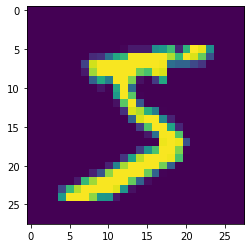

In [0]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [0]:
#check image shape
X_train[0].shape

(28, 28)

#Data pre-processing

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [0]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Building the model

Now we are ready to build our model. Here is the code:


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

#Compiling the model

In [0]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Model fit

In [0]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 169us/step - loss: 0.2098 - accuracy: 0.9542 - val_loss: 0.0683 - val_accuracy: 0.9782
Epoch 2/3
60000/60000 [==============================] - 10s 164us/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0725 - val_accuracy: 0.9770
Epoch 3/3
60000/60000 [==============================] - 10s 164us/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0717 - val_accuracy: 0.9789


#Using our model to make predictions

In [0]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[9.6135133e-10, 1.5364076e-13, 1.6884643e-08, 2.4152252e-08,
        1.2268150e-10, 6.6970945e-10, 2.8293700e-13, 9.9999881e-01,
        8.3615539e-08, 1.1502758e-06],
       [2.7518963e-09, 1.4723097e-09, 1.0000000e+00, 5.2907776e-09,
        3.4938250e-12, 7.9759545e-15, 1.8564940e-09, 3.0869364e-13,
        5.4027155e-10, 1.7331110e-17],
       [5.8394698e-09, 9.9989319e-01, 1.8036144e-05, 7.6756193e-09,
        1.8610321e-05, 5.1477002e-07, 4.2132246e-08, 5.7108997e-07,
        6.9011738e-05, 5.1527445e-09],
       [9.9999952e-01, 5.2309410e-13, 1.3697500e-07, 2.1345078e-10,
        4.0573864e-11, 2.1662829e-09, 5.0441450e-08, 5.1140930e-10,
        2.9411323e-10, 3.7245283e-07]], dtype=float32)

In [0]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#Error in classification
Image 4 was misclassified as class 3 when it was in Class 1

#Thank you for completing this notebook

## 1) Download images from Imagenet-- of 2 types of cars
## 2) Build CNN to classify

In [0]:
#code part 1
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib

tusker_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n01871265")
print(tusker_page.content)
tusker_soup = BeautifulSoup(tusker_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
indele_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504013")
print(indele_page.content)
indele_soup = BeautifulSoup(indele_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line
afrele_page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n02504458")
print(afrele_page.content)

from bs4 import BeautifulSoup
afrele_soup = BeautifulSoup(afrele_page.content, 'html.parser')#puts the content of the website into the soup variable, each url on a different line


#code part 2
tusker_str_soup=str(tusker_soup)#convert soup to string so it can be split
type(tusker_str_soup)
tusker_split_urls=tusker_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(tusker_split_urls))#print the length of the list so you know how many urls you have

#code part 2.2
indele_str_soup=str(indele_soup)#convert soup to string so it can be split
type(indele_str_soup)
indele_split_urls=indele_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(indele_split_urls))

#code part 2.3
afrele_str_soup=str(afrele_soup)#convert soup to string so it can be split
type(afrele_str_soup)
afrele_split_urls=afrele_str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(afrele_split_urls))

!mkdir /content/catsdogs_train/ 
!mkdir /content/catsdogs_test/ 

img_rows, img_cols = 32, 32 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

n_of_training_images=150#the number of training images to use
for progress in range(n_of_training_images):#store all the images on a directory
 
    if(progress%20==0):
        print(progress)
    if not tusker_split_urls[progress] == None:
      try:
        I = url_to_image(tusker_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catsdogs_train/tusker.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not indele_split_urls[progress] == None:
      try:
        I = url_to_image(indele_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catsdogs_train/indele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

for progress in range(n_of_training_images):#store all the images on a directory
  
    if(progress%20==0):
        print(progress)
    if not afrele_split_urls[progress] == None:
      try:
        I = url_to_image(afrele_split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catsdogs_train/afrele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

b'http://farm1.static.flickr.com/159/414792641_5ff1ab1582.jpg\r\nhttp://static.flickr.com/92/229750451_82302cdf63.jpg\r\nhttp://ianlockwood.files.wordpress.com/2007/03/peraheratuskertracks_2lr2_07.jpg\r\nhttp://www.clementfrancis.com/mammalimages/elephant1_tn.jpg\r\nhttp://farm2.static.flickr.com/1094/890950932_4650abb8f6.jpg\r\nhttp://www.btinternet.com/~j.j.peirson/DAWN1b16.jpg\r\nhttp://farm1.static.flickr.com/138/381356986_6819268876.jpg\r\nhttp://farm1.static.flickr.com/95/230958807_7694968936.jpg\r\nhttp://www.rsp-photos.com/photos/12937c.jpg\r\nhttp://static.flickr.com/212/510656544_933215ec3f.jpg\r\nhttp://www.gdtphoto.com/pics/elephant/slides/Old%20Tusker.jpg\r\nhttp://farm1.static.flickr.com/85/231454426_1f8f5b6706.jpg\r\nhttp://static.flickr.com/58/229061136_bda26507e7.jpg\r\nhttp://farm2.static.flickr.com/1286/756074271_303ffa32b6.jpg\r\nhttp://farm1.static.flickr.com/36/114169842_eb30bbcaf9.jpg\r\nhttp://www.yvonnevandermey.nl/images/elephant%20big%20tusker%20Duke-crossing

In [0]:

#Validation data:

for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not tusker_split_urls[progress] == None:
      try:
        I = url_to_image(tusker_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catsdogs_test/tusker.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not indele_split_urls[progress] == None:
      try:
        I = url_to_image(indele_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catsdogs_test/indele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

#do the same for bikes:
for progress in range(50):#store all the images on a directory
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not afrele_split_urls[progress] == None:
      try:
        I = url_to_image(afrele_split_urls[n_of_training_images+progress])#get images that are different from the ones used for training
        if (len(I.shape))==3: #check if the image has width, length and channels
          save_path = '/content/catsdogs_test/afrele.'+str(progress)+'.jpg'#create a name of each image
          cv2.imwrite(save_path,I)

      except:
        None

0
20
40
0
20
40
0
20
40


In [0]:
# Path to the train folder
import os
original_train = '/content/catsdogs_train/'
 
filenames = os.listdir(original_train)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'tusker':
        categories.append('0')
    elif category == 'indele':
        categories.append('1')
    else:
        categories.append('2')

In [0]:
import pandas as pd
c = pd.Series(categories)
c.value_counts()

2    110
0     96
1     73
dtype: int64

In [0]:
import pandas as pd
data = pd.DataFrame({'filename':filenames,'label':categories})

data.to_csv("original_catsdogs.csv",index=False)

In [0]:
# Path to the train folder
import os
original_test = '/content/catsdogs_test/'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'tusker':
        categories.append('0')
    elif category == 'indele':
        categories.append('1')
    else:
        categories.append('2')

import pandas as pd
data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_catsdogs_test.csv",index=False)

In [0]:
data_test

,filename,label
0,tusker.5.jpg,0
1,afrele.44.jpg,2
2,indele.25.jpg,1
3,afrele.6.jpg,2
4,afrele.10.jpg,2
...,...,...
98,afrele.11.jpg,2
99,afrele.5.jpg,2
100,afrele.46.jpg,2
101,indele.15.jpg,1


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='training',
                                             shuffle=True,
                                             seed=7)
 
'''validation_generator = datagen.flow_from_dataframe(dataframe=data, directory=original_train,
                                             x_col='filename',
                                             y_col='label',
                                             target_size=(150,150),
                                             class_mode='categorical',
                                             batch_size=10,
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)'''

test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=data_test,
directory="/content/catsdogs_test/",
x_col="filename",
y_col=None,
batch_size=10,
seed=42,
shuffle=False,
class_mode=None,
target_size=(150,150))

Found 224 validated image filenames belonging to 3 classes.
Found 103 validated image filenames.
